In [1]:
import numpy as np

# Load the coordinate data
data = np.loadtxt('PCA_prep.dat')
#check if data is loaded correclty
#print(data)

In [2]:

# Reshape data (N atoms, 3 coordinates each - x y z)
N_atoms = data.shape[1] // 3
N_frames = data.shape[0]
data = data.reshape((N_frames, N_atoms, 3))

# Flatten the coordinates for PCA
flattened_data = data.reshape(N_frames, -1)

# Center the data
mean_structure = np.mean(flattened_data, axis=0)
centered_data = flattened_data - mean_structure

# Calculate covariance matrix
covariance_matrix = np.cov(centered_data.T)

# Eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Project the data onto the first few principal components
pca_projections = np.dot(centered_data, eigenvectors[:, :3])

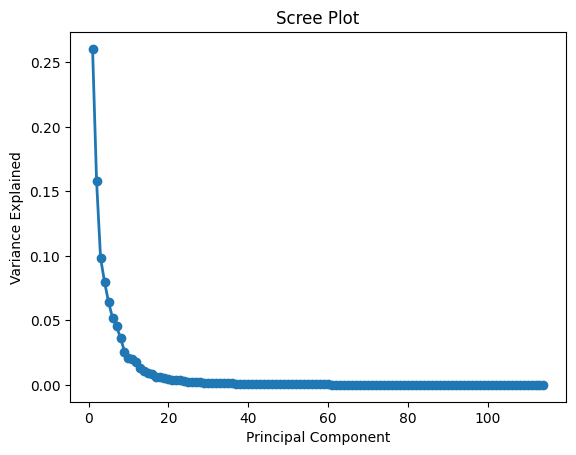

In [3]:
import matplotlib.pyplot as plt

# Assuming 'eigenvalues' is an array of the eigenvalues from the PCA
variance_explained = eigenvalues / np.sum(eigenvalues)

plt.figure()
plt.plot(range(1, len(variance_explained) + 1), variance_explained, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

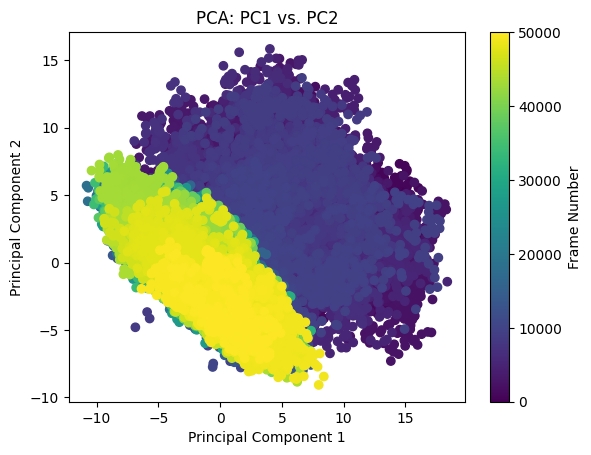

In [4]:
# Assuming 'pca_projections' is the matrix of projections onto the PCs
plt.figure()
plt.scatter(pca_projections[:, 0], pca_projections[:, 1], c=range(N_frames), cmap='viridis')
plt.colorbar(label='Frame Number')
plt.title('PCA: PC1 vs. PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

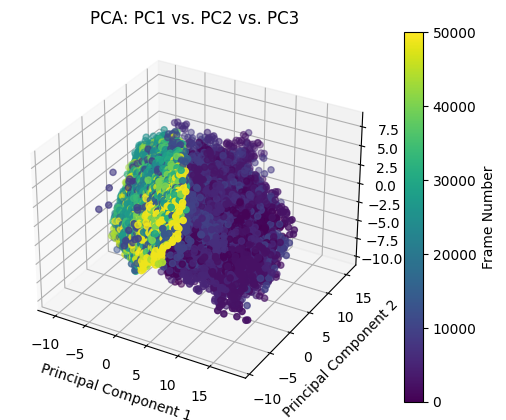

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_projections[:, 0], pca_projections[:, 1], pca_projections[:, 2], 
                     c=range(N_frames), cmap='viridis')

ax.set_title('PCA: PC1 vs. PC2 vs. PC3')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, label='Frame Number')
plt.show()

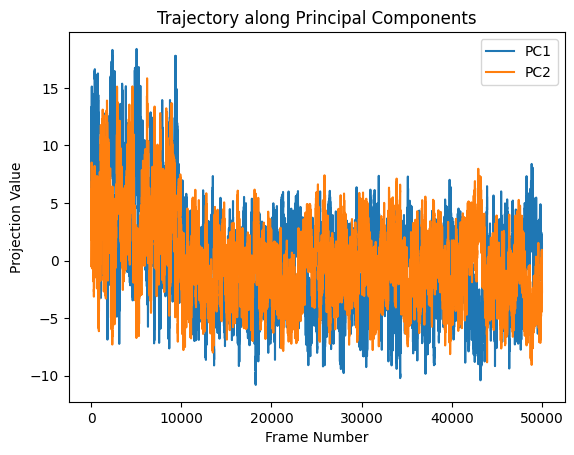

In [6]:
# visualize the time evolution of the system along a particular principal component.
plt.figure()
plt.plot(range(N_frames), pca_projections[:, 0], label='PC1')
plt.plot(range(N_frames), pca_projections[:, 1], label='PC2')
plt.xlabel('Frame Number')
plt.ylabel('Projection Value')
plt.title('Trajectory along Principal Components')
plt.legend()
plt.show()

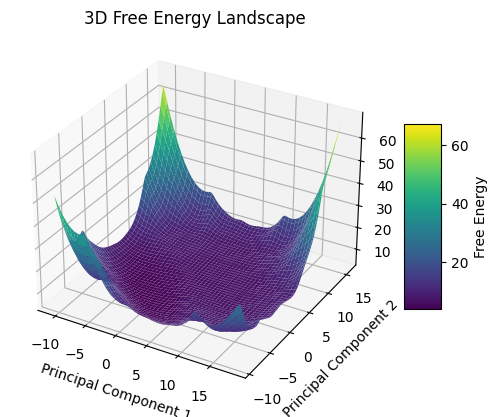

In [7]:
#Free Energy Landscape :
# project your data onto the first two PCs, construct a free energy landscape
# is useful to identify stable states and transition pathways

import seaborn as sns
from scipy.stats import gaussian_kde

# 2D histogram of the projections
x = pca_projections[:, 0]
y = pca_projections[:, 1]

# Estimate the density (similar to a free energy landscape)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Calculate free energy using the Boltzmann relation: F = -k_B * T * ln(P)
# k_B*T is set to 1  -- it's anyway just a multiplier so it's the same just less computations
free_energy = -np.log(z)

# Create a grid for plotting
xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
zi = gaussian_kde(xy)(np.vstack([xi.flatten(), yi.flatten()]))
free_energy_grid = -np.log(zi).reshape(xi.shape)

# Plotting the 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(xi, yi, free_energy_grid, cmap='viridis', edgecolor='none')

# Add color bar to show the energy scale
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Free Energy')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Free Energy')
ax.set_title('3D Free Energy Landscape')

plt.show()

In [8]:
#####                           #####
#####  THIS IS FOR 2D ANIMATION #####
#####                           #####

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

# Verify your data is loaded correctly
print(pca_projections.shape)  # Should be (N_frames, 2)
print(pca_projections[:5])  # Print the first 5 points to check

# Choose every 100th frame
frame_step = 100
frames_to_use = pca_projections[::frame_step]  # Select every 100th frame

print(f"Number of frames used: {frames_to_use.shape[0]}")

# Set up the figure and axis
fig, ax = plt.subplots()

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(np.min(frames_to_use[:, 0]) - 1, np.max(frames_to_use[:, 0]) + 1)
ax.set_ylim(np.min(frames_to_use[:, 1]) - 1, np.max(frames_to_use[:, 1]) + 1)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Trajectory in PCA Space')

# Line object to update during animation
line, = ax.plot([], [], 'o-', lw=2)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: this is called sequentially
def animate(i):
    line.set_data(frames_to_use[:i+1, 0], frames_to_use[:i+1, 1])
    return line,

# Create animation using the selected frames
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(frames_to_use), interval=50, blit=True
)

# Save animation (choose appropriate format)
ani.save('pca_trajectory.gif', writer='pillow', dpi=300)  # Save as GIF


(50001, 3)
[[ 4.56974246 -0.49498507 -0.82322497]
 [ 3.9171343   0.15434453 -0.27655156]
 [ 4.6617681   0.61389822 -0.69041731]
 [ 5.00442407  0.60107026 -0.14283581]
 [ 6.02760839  0.46166842 -0.15559636]]
Number of frames used: 501


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
#####                           #####
#####  THIS IS FOR 3D ANIMATION #####
#####                           #####
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize
%matplotlib notebook

# Verify your data is loaded correctly
print(pca_projections.shape)  # Should be (N_frames, 2)
print(pca_projections[:5])  # Print the first 5 points to check

frame_step = 100  # Frame skipping interval

# Select every 100th frame
frames_to_use = pca_projections[::frame_step]

# Use the first three principal components for 3D plotting
x = frames_to_use[:, 0]  # PC1
y = frames_to_use[:, 1]  # PC2
z = frames_to_use[:, 2]  # PC3

# Define gradients
color_gradient1 = y  # Color by PC2
color_gradient2 = z  # Color by PC3
size_gradient = x    # Size by PC1

# Handle potential negative sizes by scaling size_gradient appropriately
size_scale = np.abs(size_gradient) * 10  # Scale sizes, keeping absolute values

# Normalize color gradients for colormaps
norm_color1 = Normalize(vmin=np.min(color_gradient1), vmax=np.max(color_gradient1))
cmap_color1 = cm.get_cmap('viridis')  # Choose a colormap for color gradient 1

norm_color2 = Normalize(vmin=np.min(color_gradient2), vmax=np.max(color_gradient2))
cmap_color2 = cm.get_cmap('plasma')   # Choose a colormap for color gradient 2

# Check the new number of frames used
print(f"Number of frames used: {frames_to_use.shape[0]}")

# Set up the figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialization function: plot the background of each frame
def init():
    ax.cla()  # Clear the axis to reset the plot
    ax.set_xlim(np.min(x) - 1, np.max(x) + 1)
    ax.set_ylim(np.min(y) - 1, np.max(y) + 1)
    ax.set_zlim(np.min(z) - 1, np.max(z) + 1)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('Trajectory in PCA Space (3D)')
    return []

# Animation function: this is called sequentially
def animate(i):
    ax.cla()  # Clear the axis to reset the plot
    
    # Create a scatter plot with color and size gradients
    sc = ax.scatter(x[:i+1], y[:i+1], z[:i+1],
                    c=color_gradient1[:i+1], s=size_scale[:i+1],
                    cmap=cmap_color1, norm=norm_color1, alpha=0.7, edgecolor='w')
    
    # Overlay an additional scatter plot for the second color gradient
    sc2 = ax.scatter(x[:i+1], y[:i+1], z[:i+1],
                     c=color_gradient2[:i+1], s=0.5*size_scale[:i+1],  # Adjust size for visibility
                     cmap=cmap_color2, norm=norm_color2, alpha=0.5, edgecolor='w')
    
    # Update axis limits
    ax.set_xlim(np.min(x) - 1, np.max(x) + 1)
    ax.set_ylim(np.min(y) - 1, np.max(y) + 1)
    ax.set_zlim(np.min(z) - 1, np.max(z) + 1)
    
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('Trajectory in PCA Space (3D)')
    
    return [sc, sc2]

# Create animation using the selected frames
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(frames_to_use), interval=50, blit=True
)

# Save animation (choose appropriate format)
ani.save('pca_trajectory_3d_colored_gradient.gif', writer='pillow', dpi=300)  # Save as GIF

plt.show()


(50001, 3)
[[ 4.56974246 -0.49498507 -0.82322497]
 [ 3.9171343   0.15434453 -0.27655156]
 [ 4.6617681   0.61389822 -0.69041731]
 [ 5.00442407  0.60107026 -0.14283581]
 [ 6.02760839  0.46166842 -0.15559636]]
Number of frames used: 501


<IPython.core.display.Javascript object>